In [ ]:
import json
import pandas as pd
import h5py
import numpy as np
import tensorflow as tf
import keras
from keras.layers import Input, Dense, Dropout, LSTM, Flatten, GRU,TimeDistributed, Conv1D, BatchNormalization
from keras.models import Model, Sequential
from keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
import os
import h5py
import matplotlib.pyplot as plt
from keras import regularizers
from tensorflow.keras.regularizers import l1
import ast
from tqdm import tqdm
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import loguniform
from pandas import read_csv
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
X_train = np.load('/drive/Shareddrives/Jet Classification/Data/Quickdraw/X_train.npy', allow_pickle=True)
X_test = np.load('/drive/Shareddrives/Jet Classification/Data/Quickdraw/X_test.npy', allow_pickle=True)
y_train = np.load('/drive/Shareddrives/Jet Classification/Data/Quickdraw/y_train.npy', allow_pickle=True)
y_test = np.load('/drive/Shareddrives/Jet Classification/Data/Quickdraw/y_test.npy', allow_pickle=True)

In [ ]:
X_train.shape

(549509,)

In [ ]:
X_trainzero = np.zeros((549509,100,3))

In [ ]:

for x in tqdm(range(len(X_train))):
  for y in range(100):
    for z in range(3):
      if y >= len(X_train[x]):
        break
      else:
        X_trainzero[x][y][z] = X_train[x][y][z]

100%|██████████| 549509/549509 [02:25<00:00, 3788.83it/s]


In [ ]:
y_labhot = np.zeros((len(y_train),5))

In [ ]:
y_labhot.shape

(549509, 5)

In [ ]:
num = 0
for x in y_train:
  if x == 0:
    y_labhot[num][0] = 1
  elif x == 1: 
    y_labhot[num][1] = 1
  elif x == 2: 
    y_labhot[num][2] = 1
  elif x == 3: 
    y_labhot[num][3] = 1
  elif x == 4: 
    y_labhot[num][4] = 1
  num = num + 1

In [ ]:
y_labhot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

# Training

In [ ]:
shuffler = np.random.permutation(len(X_trainzero))
array1_shuffled = X_trainzero[shuffler]
array2_shuffled = y_labhot[shuffler]

In [ ]:
Inputs = Input(shape = (100,3))
x = Conv1D(128,(6),activation='relu')(Inputs)
x = Conv1D(64,(3),activation='relu')(x)
x = Conv1D(1, (1), activation='relu')(x)
x = LSTM(128, return_sequences=True)(x)
x = Dropout(rate = 0.5)(x)
x = LSTM(64, return_sequences=False)(x)
predictions = Dense(5, activation='softmax', kernel_initializer='lecun_uniform', name='rnn_densef')(x)
model = Model(inputs=Inputs, outputs=predictions)

model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 100, 3)]          0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 95, 128)           2432      
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 93, 64)            24640     
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 93, 1)             65        
_________________________________________________________________
lstm_1 (LSTM)                (None, 93, 128)           66560     
_________________________________________________________________
dropout_13 (Dropout)         (None, 93, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                494

In [ ]:
adam = Adam(lr = 0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(array1_shuffled, array2_shuffled, batch_size = 512, epochs = 50, 
                    validation_split = 0.2, shuffle = True, callbacks = None,
                    use_multiprocessing=True, workers=4)

Epoch 1/50
859/859 [==============================] - 36s 39ms/step - loss: 1.0394 - accuracy: 0.5505 - val_loss: 0.5241 - val_accuracy: 0.8058
Epoch 2/50
859/859 [==============================] - 33s 38ms/step - loss: 0.5137 - accuracy: 0.8085 - val_loss: 0.4294 - val_accuracy: 0.8400
Epoch 3/50
859/859 [==============================] - 33s 38ms/step - loss: 0.4116 - accuracy: 0.8491 - val_loss: 0.3610 - val_accuracy: 0.8672
Epoch 4/50
859/859 [==============================] - 33s 38ms/step - loss: 0.3602 - accuracy: 0.8683 - val_loss: 0.3352 - val_accuracy: 0.8784
Epoch 5/50
859/859 [==============================] - 33s 38ms/step - loss: 0.3259 - accuracy: 0.8807 - val_loss: 0.3278 - val_accuracy: 0.8760
Epoch 6/50
859/859 [==============================] - 33s 38ms/step - loss: 0.3016 - accuracy: 0.8895 - val_loss: 0.2882 - val_accuracy: 0.8939
Epoch 7/50
859/859 [==============================] - 33s 38ms/step - loss: 0.2816 - accuracy: 0.8965 - val_loss: 0.2665 - val_accuracy:

In [ ]:
X_testzero = np.zeros((len(X_test),100,3))

In [ ]:
X_testzero[0][0][0]

0.0

In [ ]:

for x in tqdm(range(len(X_test))):
  for y in range(100):
    for z in range(3):
      if y >= len(X_test[x]):
        break
      else:
        X_testzero[x][y][z] = X_test[x][y][z]

100%|██████████| 12500/12500 [00:03<00:00, 3884.70it/s]


In [ ]:
y_tlabhot = np.zeros((len(y_test),5))

In [ ]:
num = 0
for x in y_test:
  if x == 0:
    y_tlabhot[num][0] = 1
  elif x == 1: 
    y_tlabhot[num][1] = 1
  elif x == 2: 
    y_tlabhot[num][2] = 1
  elif x == 3: 
    y_tlabhot[num][3] = 1
  elif x == 4: 
    y_tlabhot[num][4] = 1
  num = num + 1

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
def learningCurve(history):
    plt.figure(figsize=(10,8))
    plt.plot(history.history['loss'], linewidth=1)
    plt.plot(history.history['val_loss'], linewidth=1)
    plt.title('Model Loss over Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['training sample loss','validation sample loss'])
    #plt.savefig('Learning_curve.pdf')
    plt.show()
    plt.close()

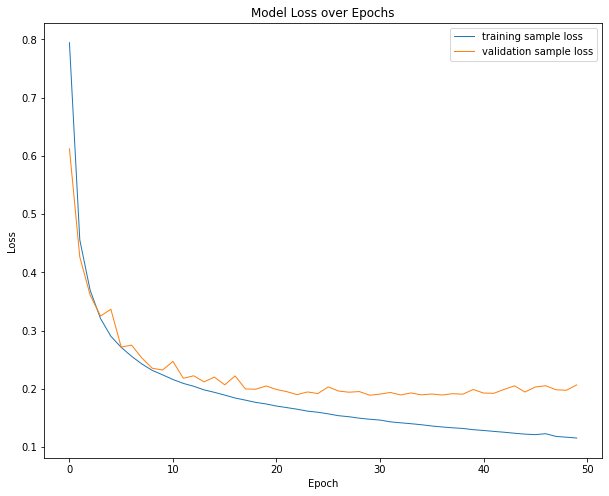

In [ ]:
learningCurve(history)

In [ ]:
labels = ['ant', 'bee', 'butterfly', 'mosquito', 'snail']


In [ ]:
def makeRoc(features_val, labels_val, labels, model, outputDir='', outputSuffix=''):
    from sklearn.metrics import roc_curve, auc
    labels_pred = model.predict(features_val)
    df = pd.DataFrame()
    fpr = {}
    tpr = {}
    auc1 = {}
    plt.figure(figsize=(10,8))       
    for i, label in enumerate(labels):

        df[label] = labels_val[:,i]
        df[label + '_pred'] = labels_pred[:,i]
        fpr[label], tpr[label], threshold = roc_curve(df[label],df[label+'_pred'])
        auc1[label] = auc(fpr[label], tpr[label])
        plt.plot(fpr[label],tpr[label],label='%s tagger, AUC = %.1f%%'%(label.replace('j_',''),auc1[label]*100.))
        
    plt.plot([0, 1], [0, 1], lw=1, color='black', linestyle='--')
    #plt.semilogy()
    plt.xlabel("Background Efficiency")
    plt.ylabel("Signal Efficiency")
    plt.xlim([-0.05, 1.05])
    plt.ylim(0.001,1.05)
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.figtext(0.25, 0.90,'LSTM ROC Curve',fontweight='bold', wrap=True, horizontalalignment='right', fontsize=14)
    #plt.figtext(0.35, 0.90,'preliminary', style='italic', wrap=True, horizontalalignment='center', fontsize=14) 
    #plt.savefig('%sROC_%s.pdf'%(outputDir, outputSuffix))
    return labels_pred

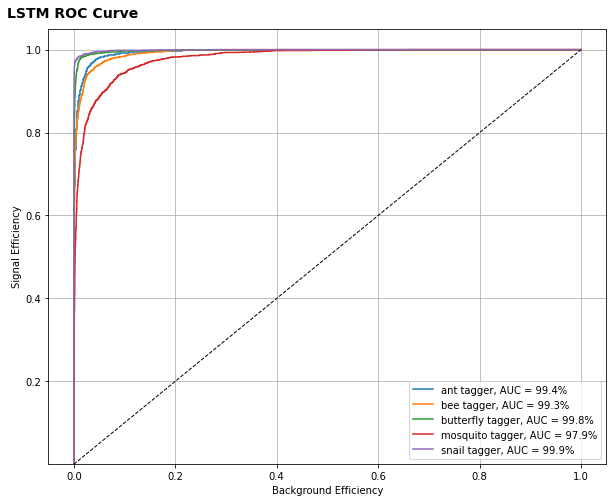

In [ ]:
y_pred = makeRoc(X_testzero, y_tlabhot, labels, model, outputSuffix='two-layer')


In [ ]:
model.save('/drive/Shareddrives/Jet Classification/Data/Quickdraw/Quickdraw5Class1.h5')

In [ ]:

ant = 0
bee = 0
butterfly = 0
mosquito = 0
snail = 0
for x in y_test:
  if x == 0:
    ant = ant + 1
  elif x == 1:
    bee = bee + 1
  elif x == 2:
    butterfly = butterfly+ 1
  elif x==3:
    mosquito = mosquito + 1
  elif x ==4:
    snail = snail + 1 

In [ ]:
print(ant)
print(bee)
print(butterfly)
print(mosquito)
print(snail)

2500
2500
2500
2500
2500


In [ ]:

ant = 0
bee = 0
butterfly = 0
mosquito = 0
snail = 0
for x in y_train:
  if x == 0:
    ant = ant + 1
  elif x == 1:
    bee = bee + 1
  elif x == 2:
    butterfly = butterfly+ 1
  elif x==3:
    mosquito = mosquito + 1
  elif x ==4:
    snail = snail + 1 

In [ ]:
print(ant)
print(bee)
print(butterfly)
print(mosquito)
print(snail)

110687
107059
104288
108399
119076


In [ ]:
Inputs = Input(shape = (100,3))

x = GRU(32, return_sequences=True)(Inputs)
x = Flatten()(x)
x = Dense(32, activation= 'relu')(x)
x = Dropout(rate = 0.5)(x)
x = Dense(16, activation = 'relu')(x)
predictions = Dense(5, activation='softmax', kernel_initializer='lecun_uniform', name='rnn_densef')(x)
model = Model(inputs=Inputs, outputs=predictions)

model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 100, 3)]          0         
_________________________________________________________________
gru_17 (GRU)                 (None, 100, 32)           3552      
_________________________________________________________________
flatten_6 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                102432    
_________________________________________________________________
dropout_12 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 16)                528       
_________________________________________________________________
rnn_densef (Dense)           (None, 5)                 85 

In [ ]:
adam = Adam(lr = 0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(array1_shuffled, array2_shuffled, batch_size = 512, epochs = 50, 
                    validation_split = 0.2, shuffle = True, callbacks = None,
                    use_multiprocessing=True, workers=4)

Epoch 1/50
859/859 [==============================] - 9s 9ms/step - loss: 0.9972 - accuracy: 0.5911 - val_loss: 0.5012 - val_accuracy: 0.8262
Epoch 2/50
859/859 [==============================] - 7s 8ms/step - loss: 0.5819 - accuracy: 0.7790 - val_loss: 0.4342 - val_accuracy: 0.8549
Epoch 3/50
859/859 [==============================] - 7s 8ms/step - loss: 0.5031 - accuracy: 0.8134 - val_loss: 0.4219 - val_accuracy: 0.8652
Epoch 4/50
859/859 [==============================] - 7s 8ms/step - loss: 0.4472 - accuracy: 0.8378 - val_loss: 0.4191 - val_accuracy: 0.8762
Epoch 5/50
859/859 [==============================] - 7s 8ms/step - loss: 0.4178 - accuracy: 0.8502 - val_loss: 0.3875 - val_accuracy: 0.8861
Epoch 6/50
859/859 [==============================] - 7s 8ms/step - loss: 0.3861 - accuracy: 0.8640 - val_loss: 0.4136 - val_accuracy: 0.8838
Epoch 7/50
859/859 [==============================] - 7s 8ms/step - loss: 0.3677 - accuracy: 0.8706 - val_loss: 0.4283 - val_accuracy: 0.8746
Epoch 

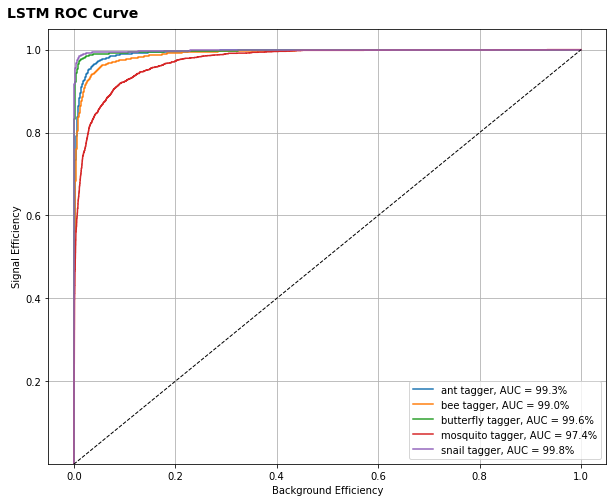

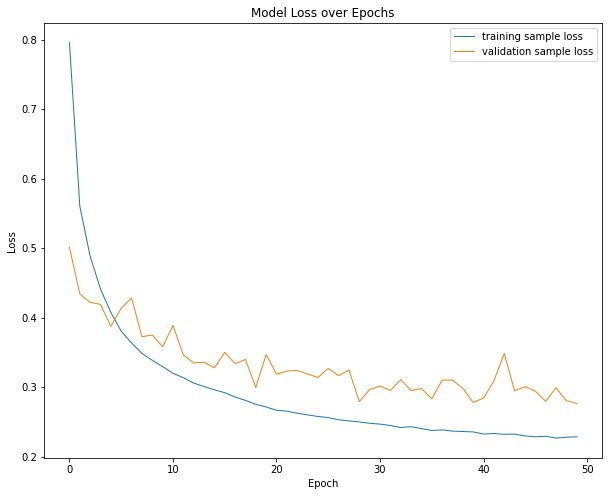

In [ ]:
y_pred = makeRoc(X_testzero, y_tlabhot, labels, model, outputSuffix='two-layer')
learningCurve(history)